
# Project: Tmdb_Movies Datast Investgation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **In this project, we will analyze the tmdb-movies dataset contains 21 columns with approximately 10,000 rows.we'll be interested in finding the best movies and the main factors associated with it. In the next section, we will explore the dataset to ask our questions.**


## Questions:
>
#### what is the distribution of producing movies over the years?
#### which of the factors is most likely to have a positive impact on profits?
#### what are the top 5 geners with the most and the worst profits ?
#### what is the top 5 movies ?
#### what are the properties of a successful movie ?
#### what is the worst 5 movies ?
#### what are the properties of a flop movie ?
#### are movies likely to success or not?

In [1]:
# import the needed libraries.
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> **In this section, we'll inspect the data, check for cleanliness, and then trim and clean the dataset for analysis.**

### General Properties

In [2]:
# Loading data and print out few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#we will define the dataset to only include the important columns for us.
df = df.iloc[:,np.r_[2:3,5:6,12:14,16:21]]
df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#columns and rows in a dataset
df.shape

(10866, 9)

In [5]:
# describe some information for each column
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#countaing the null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   original_title  10866 non-null  object 
 2   runtime         10866 non-null  int64  
 3   genres          10843 non-null  object 
 4   vote_count      10866 non-null  int64  
 5   vote_average    10866 non-null  float64
 6   release_year    10866 non-null  int64  
 7   budget_adj      10866 non-null  float64
 8   revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 764.1+ KB


In [7]:
#more inspect in the null values
df[df.genres.isnull()]

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,Belli di papÃ,100,NaN,21,6.1,2015,0.00000,0.0
620,0.129696,All Hallows' Eve 2,90,NaN,13,5.0,2015,0.00000,0.0
997,0.330431,Star Wars Rebels: Spark of Rebellion,44,NaN,13,6.8,2014,0.00000,0.0
1712,0.302095,Prayers for Bobby,88,NaN,57,7.4,2009,0.00000,0.0
1897,0.020701,Jonas Brothers: The Concert Experience,76,NaN,11,7.0,2009,0.00000,0.0
2370,0.081892,Freshman Father,0,NaN,12,5.8,2010,0.00000,0.0
2376,0.068411,Doctor Who: A Christmas Carol,62,NaN,11,7.7,2010,0.00000,0.0
2853,0.130018,Vizontele,110,NaN,12,7.2,2001,0.00000,0.0
3279,0.145331,ì•„ê¸°ì™€ ë‚˜,96,NaN,11,6.1,2008,0.00000,0.0
4547,0.520520,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,12,8.3,2012,0.00000,0.0


In [8]:
#more inspect in the data type 
print(type(df['original_title'][0]))
print(type(df['genres'][0]))

<class 'str'>
<class 'str'>


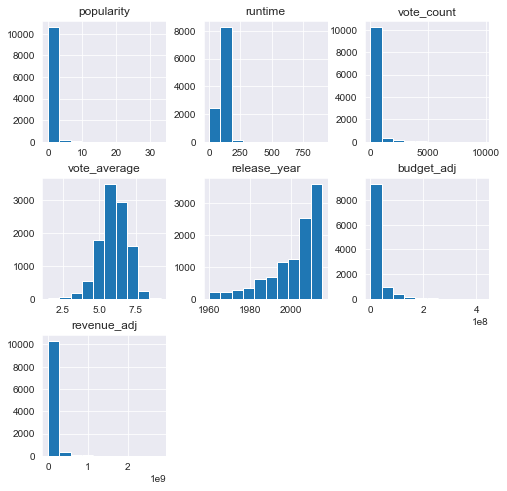

In [9]:
df.hist(figsize=(8,8));

In [10]:
#looking for duplicated rows
df.duplicated().sum()

1

### Data Cleaning 
### 1: Drop any duplicated data

In [11]:
df.drop_duplicates(inplace=True)

### 2: Null values issue:

In [12]:
#seems that all the null values in geners columns are with 0 budget, revenue or even both.
#so we'll drop them
df.dropna(inplace=True)

### 3: zero's values:

In [13]:
# replacing 0 with NaN then fill null values with the mean 
df['runtime'] = df['runtime'].replace({ 0:np.nan})

df.fillna(df.mean(),inplace=True)

In [14]:
df.isnull().sum()

popularity        0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

### 4:Adding profits and status for each movie:

In [15]:
# calculate the profits for each movie and assign the result in new column 'profits' Q1:Top 5 movies with the highest profits
df['net_profit'] = df.revenue_adj - df.budget_adj
# classify the movies with 2 categories (successful, flop) 
df['status'] = np.where((df.revenue_adj > df.budget_adj), 'successful', 'flop')
df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit,status
0,32.985763,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,successful
1,28.419936,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,successful
2,13.112507,Insurgent,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,successful
3,11.173104,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,successful
4,9.335014,Furious 7,137.0,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,successful


<a id='eda'></a>
## Exploratory Data Analysis


### Q1: what is the distribution of producing movies over the years?

> we will try to visulaze the years along with the number of movies produces in order to discover the relashionship between them 

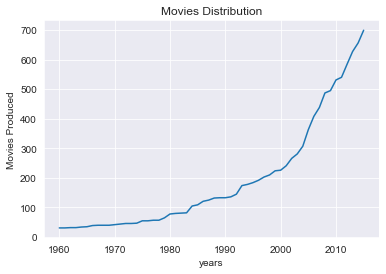

In [16]:
film_count = df.release_year.value_counts(ascending=True)
year = df.groupby('release_year',as_index=False).sum()['release_year']


plt.plot(year,film_count)
plt.title('Movies Distribution')
plt.xlabel('years')
plt.ylabel('Movies Produced')
plt.show()

> The chart indicates that the movies produced each year are incremental overtime. as we notice that between 2000 and 2010 approximately 300% increment.


### Q2:  which of the factors is most likely to have a positive impact on profits?

> We'll use a scatter chart to see if there is any impact on profits based on budget, vote average, or popularity.

<AxesSubplot:xlabel='popularity', ylabel='net_profit'>

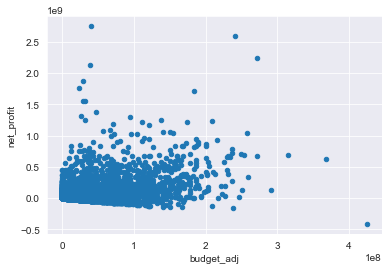

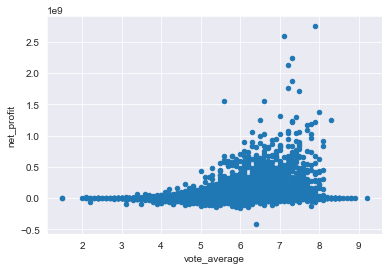

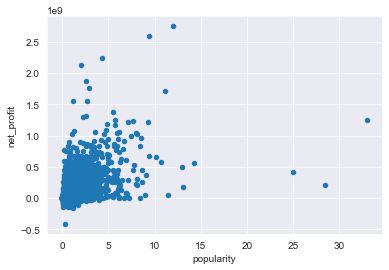

In [17]:
df.plot(x='budget_adj',y='net_profit',kind='scatter')
df.plot(x='vote_average',y='net_profit',kind='scatter')
df.plot(x='popularity',y='net_profit',kind='scatter')

> As the scatter chart illustrates the there is a positive impact between vote average and profit.

### Q3:  what are the top 5 geners with the most and the worst profits ?

> We'll check for the count of each unique value and try to illustrate them with the appropriate chart type.

In [18]:
df.genres.value_counts()

Drama                                       712
Comedy                                      712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Action|Adventure|Comedy|Drama|Mystery         1
Animation|Drama|Science Fiction|Thriller      1
Animation|Drama|Fantasy                       1
Crime|Drama|Thriller|Horror                   1
Comedy|Romance|Music                          1
Name: genres, Length: 2039, dtype: int64

In [19]:
df.groupby('genres').sum().sort_values(by='net_profit',ascending = False)['net_profit'][0:5]

genres
Comedy                              1.716410e+10
Drama                               1.376784e+10
Comedy|Romance                      1.047115e+10
Adventure|Action|Thriller           9.070750e+09
Adventure|Action|Science Fiction    8.365912e+09
Name: net_profit, dtype: float64

In [20]:
def pie_chart(x,y):
      fig1, ax1 =plt.subplots()
      ax1.pie(x,labels=y, autopct='%1.1f%%', startangle=90,radius=1.5)
      plt.show();

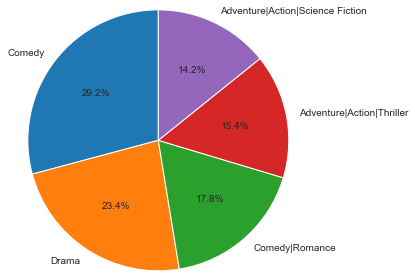

In [21]:
labels = ['Comedy','Drama','Comedy|Romance','Adventure|Action|Thriller','Adventure|Action|Science Fiction']
sizes = [1.716410e+10,1.376784e+10,1.047115e+10,9.070750e+09,8.365912e+09]
pie_chart(sizes,labels)

> Comedy wins the competition with 29.25% followed by Drama with 23.4%.

In [22]:
df.groupby('genres').sum().sort_values(by='net_profit',ascending = True)['net_profit'][0:5]

genres
Adventure|Fantasy|Action|Western|Thriller   -4.139124e+08
Science Fiction                             -1.731430e+08
Action|Drama|Foreign|History                -1.404092e+08
Western|History|War                         -1.375868e+08
Action|Adventure|Western                    -1.336917e+08
Name: net_profit, dtype: float64

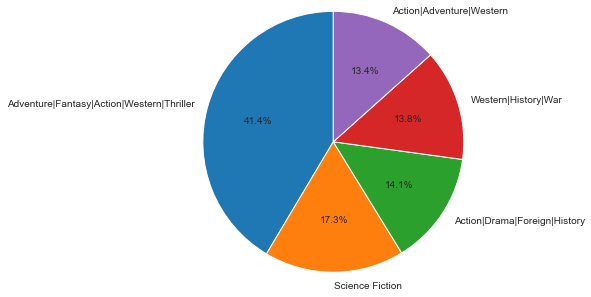

In [23]:
labels = ['Adventure|Fantasy|Action|Western|Thriller','Science Fiction',
          'Action|Drama|Foreign|History','Western|History|War','Action|Adventure|Western']
sizes = [4.139124e+08,1.731430e+08,1.404092e+08,1.375868e+08,1.336917e+08]
pie_chart(sizes,labels)

> For the worst movie genres(Adventure|Fantasy|Action|Western|Thriller) come in the top with a high percentage equal to 41.4%.

### Q4:  what is the top 5 movies ?

In [24]:
top_movies = df.groupby('original_title').sum().sort_values(by='net_profit',ascending = False)
top_movies.head()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
original_title,,,,,,,,
Star Wars,12.037933,121.0,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09
Avatar,9.432768,162.0,8458,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09
Titanic,4.574583,367.0,4675,13.4,3993,2.897649e+08,2.506406e+09,2.216641e+09
The Exorcist,2.010733,122.0,1113,7.2,1973,3.928928e+07,2.167325e+09,2.128036e+09
Jaws,2.563191,124.0,1415,7.3,1975,2.836275e+07,1.907006e+09,1.878643e+09


In [25]:
def hist_chart(x,y,title,xlabel,ylabel):
   plt.figure(figsize=(10,8));
   chart=sns.barplot(x=x,y=y)
   chart.set_xticklabels(chart.get_xticklabels(), fontsize = 12, rotation = 20);
   plt.title(title,fontsize = 20)
   plt.xlabel(xlabel,fontsize = 20)
   plt.ylabel(ylabel,fontsize = 20);

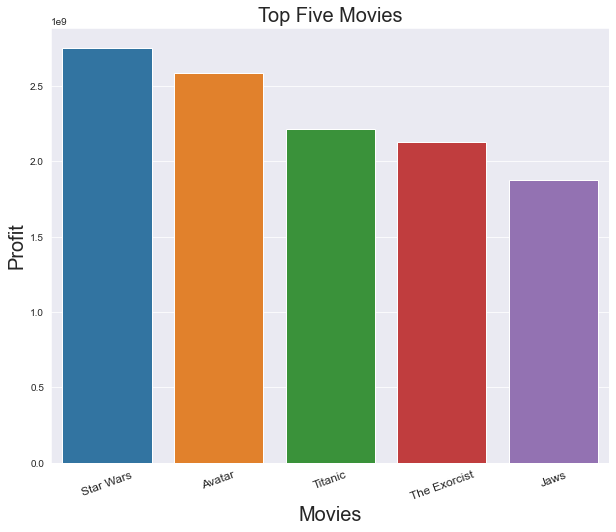

In [26]:
labels = ['Star Wars', 'Avatar', 'Titanic', 'The Exorcist', 'Jaws']
amount = [2.750137e+09, 2.586237e+09, 2.216641e+09, 2.128036e+09, 1.878643e+09]
title = 'Top Five Movies'
xlabel = 'Movies'
ylabel = 'Profit'
hist_chart(labels,amount,title,xlabel,ylabel)

> Star Wars in the top with net profits equal to 2 Billion. 

### Q5:  what are the properties of a successful movie ?

In [27]:
top_movies.mean()['runtime']

105.27660745002933

In [28]:
top_movies.mean()['budget_adj']

18077319.931138173

### Q6:  what is the worst 5 movies ?

In [29]:
df_new = df
df_new = df.drop(df[df.budget_adj == 0].index)
df_new = df.drop(df[df.revenue_adj == 0].index)
worst_movies = df_new.groupby('original_title').sum().sort_values(by='net_profit',ascending = True)
worst_movies.head()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
original_title,,,,,,,,
The Warrior's Way,0.250540,100.0,74,6.4,2010,4.250000e+08,1.108757e+07,-4.139124e+08
The Lone Ranger,1.214510,149.0,1607,6.0,2013,2.386885e+08,8.357833e+07,-1.551102e+08
The Alamo,0.948560,137.0,60,5.9,2004,1.673946e+08,2.980774e+07,-1.375868e+08
The 13th Warrior,1.189386,102.0,275,6.2,1999,2.094485e+08,8.076712e+07,-1.286813e+08
Brother Bear,1.653031,85.0,753,6.8,2003,1.185353e+08,2.963382e+02,-1.185350e+08


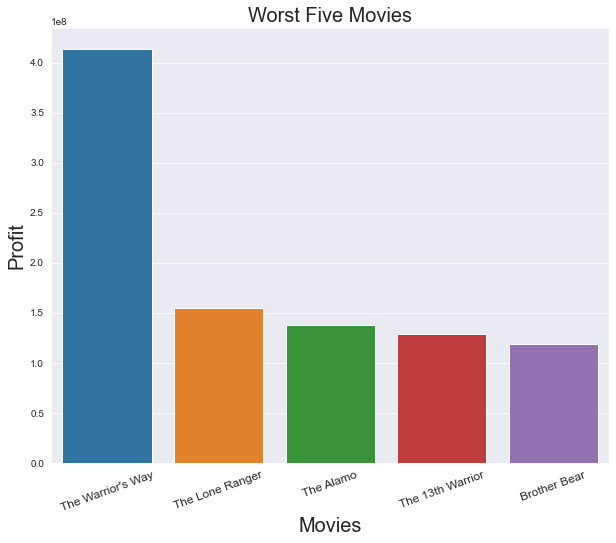

In [30]:
labels = ["The Warrior's Way", 'The Lone Ranger', 'The Alamo', 'The 13th Warrior', 'Brother Bear']
amount = [4.139124e+08, 1.551102e+08, 1.375868e+08, 1.286813e+08, 1.185350e+08]
title = 'Worst Five Movies'
xlabel = 'Movies'
ylabel = 'Profit'
hist_chart(labels,amount,title,xlabel,ylabel)

> The Warrior's Way came in the top with losses of approximate to 4 Million.

### Q5:  what are the properties of a flop movie ?

In [31]:
worst_movies.mean()['runtime']

109.57241523650063

In [32]:
worst_movies.mean()['budget_adj']

35684582.11178354

### Q6: are movies likely to success or not?

In [33]:
classify = df.groupby('status').sum().sort_values(by='net_profit',ascending = False)
classify.head()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
status,,,,,,,,
successful,4403.300214,408667.000000,1967102,23527.4,7547197,1.322690e+11,5.382877e+11,4.060187e+11
flop,2616.467517,701790.655383,394542,41243.4,14151058,5.841057e+10,1.983652e+10,-3.857405e+10


In [34]:
df.status.value_counts()

flop          7069
successful    3773
Name: status, dtype: int64

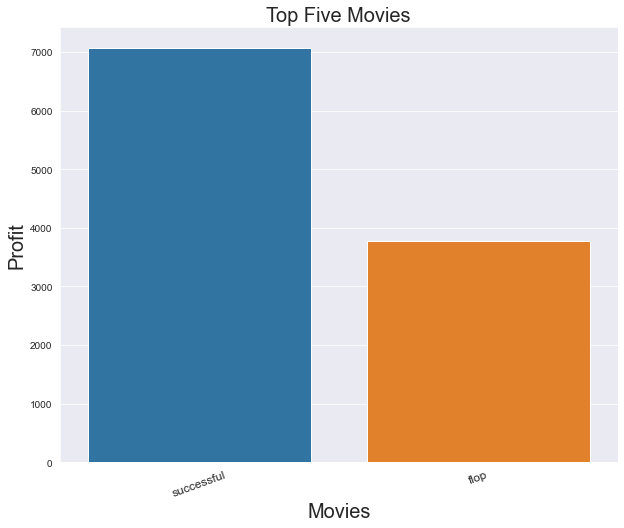

In [35]:
labels = ['successful', 'flop']
amount = [7069, 3773]
title = 'Top Five Movies'
xlabel = 'Movies'
ylabel = 'Profit'
hist_chart(labels,amount,title,xlabel,ylabel)

> Movies that success is about twice the amount of those weren't.

## Limitations:
>
#### *The cuerncy was not mentioned. I assume it's in dollars.
#### *Some data in the budget , revenue or even both was missing.
#### *There was no clean classification for the genres column.

<a id='conclusions'></a>
## Conclusions

#### *Movies production are incremental over the years.

####  *Vote Average has a positive impact on Profit where it's associated with higher Profit when it is high.

#### *Comedy and Drama are the most geners have been used.

#### *Comedy and Drama are the most geners associated with hieghst profits.

#### *(Adventure|Fantasy|Action|Western|Thriller) and (Science Fiction) are the worst geners with the lost profit.

#### *Mean value of the runtime for  top movies is 105.

#### *Mean value of the runtime for  worst movies is 109.

#### *Mean value of the budget_adj of the top movies is 180M.

#### *Mean value of the budget_adj for  worst movies is 35M.

#### *Movies are more likely to succeed than flop.

### References:
>
https://stackoverflow.com/questions/45416684/python-pandas-replace-multiple-columns-zero-to-nan
>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
>
https://datatofish.com/line-chart-python-matplotlib/
>
https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py